In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
# Parámetros
omega = np.pi 
h = 0.01 
t=np.arange(0,100+h,h)
x0 = 1
v0 = 1 
print(t)

[0.000e+00 1.000e-02 2.000e-02 ... 9.998e+01 9.999e+01 1.000e+02]


In [3]:
# Función para el método de Verlet
def verlet(x0, v0, omega, h, t):
    x = np.zeros(len(t))
    v = np.zeros(len(t))
    x[0] = x0
    v[0] = v0
    
    # Primer paso utilizando Euler
    v_1 = v0 - 0.5 * h * omega**2 * x0
    
    for i in range(1, len(t)):
        x[i] = x[i-1] + h * v_1
        v[i] = v_1 - 0.5 * h * omega**2 * x[i]
        v_1 = v[i]
    
    return x, v

<IPython.core.display.Javascript object>


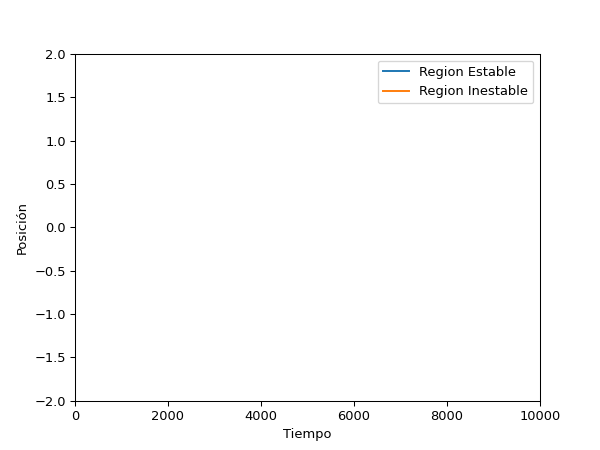

In [6]:
x_stable, v_stable = verlet(x0, v0, omega, h, t)
x_unstable, v_unstable = verlet(x0, v0, 2 * omega, h, t)

fig, ax = plt.subplots()

stable, = ax.plot([], [], label='Region Estable')
unstable, = ax.plot([], [], label='Region Inestable')

def init():
    ax.set_xlim(0, len(t))
    ax.set_ylim(-2, 2)
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Posición')
    ax.legend()
    return stable, unstable

def update(frame):
    stable.set_data(np.arange(frame) * h, x_stable[:frame])
    unstable.set_data(np.arange(frame) * h, x_unstable[:frame])
    return stable, unstable

ani = anim.FuncAnimation(fig, update, frames=len(t), init_func=init)

